In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 셋의 target 배열은 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target
print ('Boston 데이터 셋 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [85]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt( -1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared-error")로 반환된 값은 모두 음수
print ('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print ('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print ('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


In [86]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# 사이킷런은 Ridge 클래스를 통해 릿지 회귀를 구현한다. 
# Ridge 클래스의 주요 생성 파라미터는 alpha이며, 이는 릿지 회귀의 alpha L2 규제 계수에 해당한다.
# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print ('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print ('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print ('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


릿지의 5개 폴드 세트의 평균 RMSE가 5.518이다. 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보인다. 다음은 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴본다. alpha 값을 변화하면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고 DataFrmae에 저장하는 예제이다.

In [87]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
  ridge = Ridge(alpha = alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print ('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


alpha가 100일 때 평균 RMSE가 5.330으로 가장 좋다. 이번에는 alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화를 진행한다. 회귀 계수를 Ridge 객체의 coef_ 속성에 추출한 뒤에 Series 객체로 만들어서 시본 가로 막대 차트로 표시하고, DataFrame에 alpha 값별 회귀 계수로 저장한다.

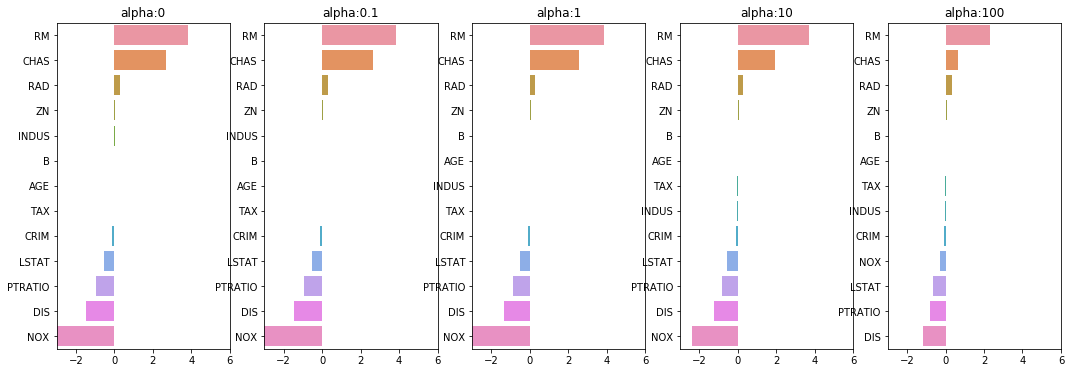

In [88]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 aixs의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)

  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff

  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [89]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [0]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None, verbose = True):
  coeff_df = pd.DataFrame()
  if verbose : print ('####### ', model_name, '#######')
  for param in params:
    if model_name == "Ridge": model = Ridge(alpha=param)
    elif model_name == "Lasso": model = Lasso(alpha=param)
    elif model_name == "ElasticNet": model = ElasticNet(alpha=param, l1_ratio = 0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print ('alpha {0}일 때 5 폴드 셋의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df

# end of get_linear_regre_eval

In [98]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 셋의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 셋의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 셋의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 셋의 평균 RMSE: 6.189


In [99]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [100]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 셋의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 셋의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 셋의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 셋의 평균 RMSE: 6.068


In [101]:
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# metod는 표준 정규 분포 변환 (Standard), 최댓값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.

def get_scaled_data(method='None', p_degree=None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

In [103]:

# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표쥰정규 분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그 변환
scaled_methods = [(None, None), ('Standard', None), ('Standard',2), ('MinMax',None), ('MinMax',2), ('Log', None)]

for scaled_method in scaled_methods:
  X_data_scaled = get_scaled_data(method=scaled_method[0], p_degree=scaled_method[1], input_data=X_data)
  print ('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scaled_method[0], scaled_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose=True)


## 변환 유형:None, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 셋의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 셋의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 셋의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 셋의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 셋의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 셋의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
#######  Ridge #######
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 셋의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 셋의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 셋의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 셋의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 셋의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 셋의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
#######  Ridge #######
alpha 0.1일 때 5 폴드 셋의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 셋의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 셋의 평균 RMSE: 5.185
alpha 100일 때 5 